<a href="https://colab.research.google.com/github/NelsonKamau/Movies_Recommendations-by---Association_rules/blob/main/Movies_Recommendations_by_%3E_Association_rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="section-one"></a>
# 1. INTRODUCTION TO ASSOCIATION RULES
Association rules analysis related algorithms, such as Apriori and FP-growth tree algorithms that can be defined as a developed techniques that been used for the transactional data type to compute how much association is between data values and thier relative combinations, like if a customer is 70% to buy a milk how likley a customer will also buy bread. Here will use two main types of algorithms are being used: The Apriori and the FP Growth, where data are structured as shown in **table 1**.


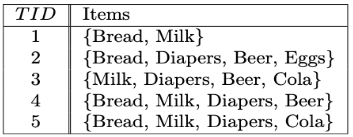

>- Table 1. *Transactional data example, adapted from Tan and etl (2013) Association Analysis: basic concepts and algorithms in Introduction to data mining*

It can be seen in the previous figure that ‘Bear’ from items columns have been seen in multiple rows, which means in cases such as  this item occur transaction this item occurs in most of rows which consider as support measure, but what does that means?.

<a id="subsection-one"></a>
# THEORETICAL PART

## 1.1. MAJOR COMPUTATION IN ASSOCIATION RULES
Association rules in general have the listed below major computaions in the dataset.

**Support:**
Is the percentage of the transaction that contains the items from the data set , which means how many times did the items occur in the dataset (Agrawal et al, 1993).

$ support  (A→C)=support (A∪C)$  ---> (range[0,1])

**Confidence:** The probability that items on left hand side and right hand side  of ruleset are occurring together, with a higher confidence will reflect a higher likelihood of the items that will be purchased together based on the given rule (Agrawal et al, 1993).

$confidence (A→C)=support (A→C) support(A)$  ---> (range [0,1])

**Lift:**
Probability of the all items set all occurring together in the rule. lift value more than 1 reflects that the presence of the item will increase with the presence of the other items and its occurrence in the same transaction, so the lift summarizes the strength of association rule as a link between the items of both sides (Brin et al, 1997).

$lift (A→C)=confidence (A→C) support(C)$ ---> (range[0,∞])

>- Note that left hand side and right hand side of the rules are identfied also as "antecedents" and "consequents".

## 1.2. STEPS TO COMPUTE ASSOCIATION RULES

>- 1. GENERATE FREQUENT ITEMSETS

>- 2. APPLY ASSOCIATION RULES ON GENERATED ITEMS SETS

### 1. GENERATE FREQUENT ITEMSETS

Two Algorithms (Apriori, and Fpgrowth) are going to be disccussed to generaten frequent itemsets which are going to be used later on to create association rules
### **Apriori Algorithm**
A pseudocode in **figure 2** implements the frequests itemsets generation of apriori algorithm. where Ck adopts a set of candidate k-itemsets, and the frequent set if itemsets are represented by Fk. apriori following the belows steps: (Tan and etl 2013)

1- The algorithm initially makes a single pass over the data set to determine the support of each item. Upon completion of this step, the set of all frequent 1-itemsets K.



2- Algorithm generate new candidate k-itemsets and prune unnecessary candidates that are guaranteed to be infrequent given the frequent (k−1) itemsets found in the previous iteration.


3- Algorithm makes an additional pass to count the support of the generated candidates. The subset function is used to determine all the candidate itemsets in Ck that are contained in each transaction t. 


4- After counting support, the algorithm eliminates all candidate itemsets whose support counts are less than N  minimum support which is chosen by the user. 


5- The algorithm terminates when there are no new frequent itemsets generated, ie Fk = ∅.


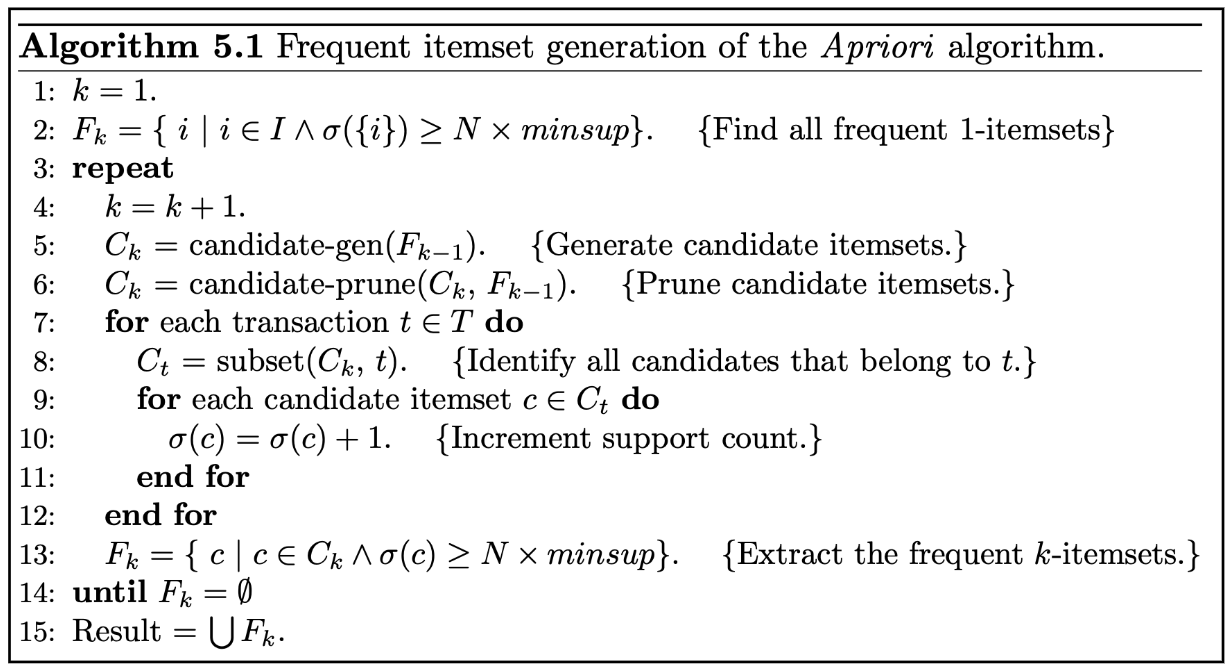

>- Figure 2  *Apriori algorithm Pseudocode, adapted from Tan and etl (2013) Association Analysis: basic concepts and algorithms in Introduction to data mining*

### **Fp-Growth Algorithm**
The algorithm does not create candidate sets in the same fashion as apriori in terms of multiple passes over the entire dataset. since it needs only two scans over the dataset to extract frequent itemsets from it, which makes it faster  and less expensive than apriori.

1- The algorithm scans the whole dataset one time to calculate each item support cout. and ignore the infrequent items, and sort the generated item set in a descending order.

2- Algorithm construct the Fp-tree by making a second pass over the data set. After reading the first transaction the first transaction is created  as a node between those items where a path is generated to encode this relation, and every node along the path has a frequency count of 1.

3- This process continues until  all the generated transactions are mapped onto their relative path that have been constructed by the Fp-Tree.

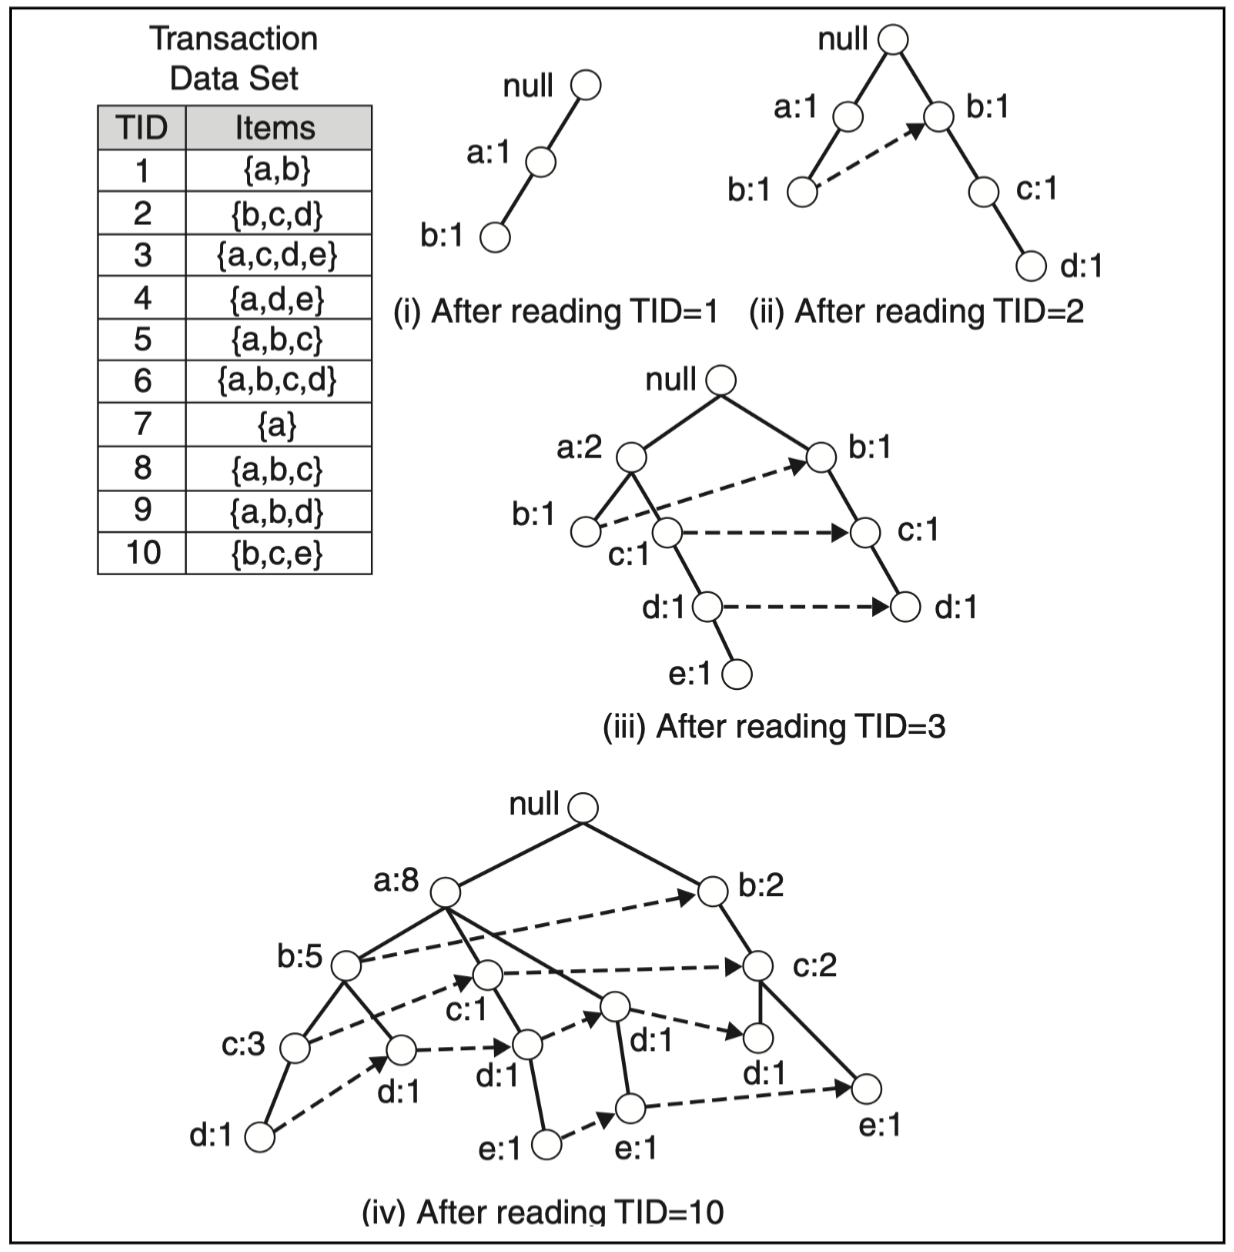


>- Figure 3.  *Fp-Growth algorithm generation, adapted from Tan and etl (2013) Association Analysis: basic concepts and algorithms in Introduction to data mining.*


## Drawbacks in association rules 
Due to the iterative process of rules generation in association rules mining where every item in the dataset is compared against each item and so on, the increase in items and transaction can make the computation very expensive, (Tan and etl 2013) listed some limitations that can be solved by decrease the dimensionality in datasets.and reduce the number of item sets in terms of columns and rows that need to be computed, that can be reduced by setting threshold to compute items sets that pases the threshold only.

<a id="subsection-two"></a>
# 2. PRACTICAL PART

<img src="https://media.giphy.com/media/heIX5HfWgEYlW/giphy.gif">



## 2.1. DATASET (ml-latest-small.zip)


<p><span style="color:red"> <em>for the demonstration purpose we selected a smaller version of dataset to implement the tutorial.
</em></span></p>

This dataset (ml-latest) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 27753444 ratings and 1108997 tag applications across 58098 movies. These data were created by 283228 users between January 09, 1995 and September 26, 2018. This dataset was generated on September 26, 2018.

More information about the data and description can be found in the link: http://files.grouplens.org/datasets/movielens/ml-latest-README.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 2.2. SELECTED DATA

Here we can see from the directory of the uncompressed file that we have a total of 5 data set, we are going to select and observed which one that contain needed data for the implementation of association rules. which should look similar to **Table. 1**.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Colab Notebooks/Movies_Recommendations by -> Association_rules/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Movies_Recommendations by -> Association_rules


In [3]:
data_movies = pd.read_csv('movies.csv')
data_tages = pd.read_csv('tags.csv')
data_ratings = pd.read_csv('ratings.csv')

### Movies Data

This is the only dataset that contains the titile of the movies and each movie unique key.

In [4]:
data_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
data_movies.movieId.value_counts(), print('Number of duplicated unique ids are: ', data_movies.movieId.duplicated().sum())

Number of duplicated unique ids are:  0


(1         1
 53322     1
 53129     1
 53138     1
 53140     1
          ..
 4390      1
 4392      1
 4393      1
 4394      1
 193609    1
 Name: movieId, Length: 9742, dtype: int64, None)

### Movies tages Data
This dataset contain the added tags to the movie plus the userid which is valuable to be considered as an index to each transaction, on the other hand the dataset has less movie ids than the rating dataset which made us select it instead.

In [6]:
data_tages

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [7]:
data_tages.movieId.value_counts()

296     181
2959     54
924      41
293      35
7361     34
       ... 
3307      1
3310      1
3317      1
830       1
2719      1
Name: movieId, Length: 1572, dtype: int64

## 2.3. MERGING DATASETS

in this case inner join is selected since we need the data only when both movieId labels are existed on both datasets.

more details about merging can be found in pandas documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html 

In [8]:
merge = data_movies.merge(data_tages, on='movieId', how='inner')
merge

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932
...,...,...,...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars,1528934552
3679,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime,1537098582
3680,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy,1537098587
3681,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama,1537098603


Dropiong unneeded columns.

In [9]:
merge.drop(columns=['tag', 'timestamp', 'genres'], inplace=True)

In [10]:
merge

,movieId,title,userId
0,1,Toy Story (1995),336
1,1,Toy Story (1995),474
2,1,Toy Story (1995),567
3,2,Jumanji (1995),62
4,2,Jumanji (1995),62
...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),62
3679,193565,Gintama: The Movie (2010),184
3680,193565,Gintama: The Movie (2010),184
3681,193565,Gintama: The Movie (2010),184


Since we are going to merge. Lets observe how many users we have.

In [11]:
len(merge.userId.unique())

58

Here we preprocess the dataset to create a transactional list were every row represent a user and his selected movies, which is similar to table. 1.

In [12]:
merge_list = merge.groupby(by = ['userId'])['title'].apply(list).reset_index()
merge_list.head()

,userId,title
0,2,"[Step Brothers (2008), Step Brothers (2008), S..."
1,7,"[Departed, The (2006)]"
2,18,"[Carlito's Way (1993), Carlito's Way (1993), C..."
3,21,"[My Best Friend's Wedding (1997), My Best Frie..."
4,49,"[Interstellar (2014), Interstellar (2014), Int..."


sample of the list

In [13]:
merge_list = merge_list['title'].tolist()
merge_list[0:3]

[['Step Brothers (2008)',
  'Step Brothers (2008)',
  'Step Brothers (2008)',
  'Warrior (2011)',
  'Warrior (2011)',
  'Warrior (2011)',
  'Wolf of Wall Street, The (2013)',
  'Wolf of Wall Street, The (2013)',
  'Wolf of Wall Street, The (2013)'],
 ['Departed, The (2006)'],
 ["Carlito's Way (1993)",
  "Carlito's Way (1993)",
  "Carlito's Way (1993)",
  'Godfather: Part II, The (1974)',
  'Godfather: Part II, The (1974)',
  'Pianist, The (2002)',
  'Pianist, The (2002)',
  'Lucky Number Slevin (2006)',
  'Fracture (2007)',
  'Fracture (2007)',
  'Fracture (2007)',
  'Upside Down: The Creation Records Story (2010)',
  'Upside Down: The Creation Records Story (2010)',
  'Upside Down: The Creation Records Story (2010)',
  'Just Eat It: A Food Waste Story (2014)',
  'Just Eat It: A Food Waste Story (2014)']]

In [14]:
len(merge_list)

58

## 2.4. DATA TRANSFORMATION

Here data is transfered as a binary input to be accepted by the algorithm, serveral methods are avalible in several packages such as:

---


```python 
pandas.get_dummies```


```from mlxtend.preprocessing import TransactionEncoder```




```sklearn.preprocessing.OneHotEncoder```

In [15]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(merge_list).transform(merge_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [16]:
df.head()

,(500) Days of Summer (2009),...And Justice for All (1979),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),"11'09""01 - September 11 (2002)",12 Angry Men (1957),127 Hours (2010),13 Going on 30 (2004),2001: A Space Odyssey (1968),21 Grams (2003),25th Hour (2002),28 Days Later (2002),"39 Steps, The (1935)",3:10 to Yuma (2007),"40-Year-Old Virgin, The (2005)","400 Blows, The (Les quatre cents coups) (1959)",42 Up (1998),84 Charing Cross Road (1987),8MM (1999),A Million Ways to Die in the West (2014),A Pigeon Sat on a Branch Reflecting on Existence (2014),A Story of Children and Film (2013),A.I. Artificial Intelligence (2001),About a Boy (2002),"Accused, The (1988)",Adam's Rib (1949),Addams Family Values (1993),"Addams Family, The (1991)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","African Queen, The (1951)",After the Thin Man (1936),"Age of Innocence, The (1993)",Air Force One (1997),Airheads (1994),Airplane! (1980),Akira (1988),Aladdin (1992),Alfie (1966),Alice Adams (1935),Alice Doesn't Live Here Anymore (1974),Alice in Wonderland (1951),Alien (1979),Aliens (1986),Alive (1993),All About Eve (1950),All the King's Men (1949),All the President's Men (1976),All the Real Girls (2003),Almost Famous (2000),Amadeus (1984),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",Amen. (2002),America's Sweethearts (2001),American Gangster (2007),American History X (1998),American Movie (1999),American Pie (1999),"American President, The (1995)",American Splendor (2003),"American in Paris, An (1951)","Americanization of Emily, The (1964)",Anastasia (1956),Anatomy of a Murder (1959),Anchorman 2: The Legend Continues (2013),Anchorman: The Legend of Ron Burgundy (2004),And Then There Were None (1945),And the Band Played On (1993),"Andalusian Dog, An (Chien andalou, Un) (1929)",Angel's Egg (Tenshi no tamago) (1985),Angie (1994),Animal House (1978),"Animatrix, The (2003)",Anna Karenina (1997),Anne Frank Remembered (1995),Anne of the Thousand Days (1969),Annie Hall (1977),Another Thin Man (1939),"Apartment, The (1960)",Apocalypse Now (1979),Apollo 13 (1995),Arachnophobia (1990),Argo (2012),"Aristocats, The (1970)",Armageddon (1998),Around the World in 80 Days (1956),Arrival (2016),"Arrival, The (1996)",Arsenic and Old Lace (1944),"Astronaut's Wife, The (1999)",Au Hasard Balthazar (1966),Auntie Mame (1958),Avalon (1990),Avatar (2009),"Avengers, The (2012)",Avengers: Infinity War - Part I (2018),"Aviator, The (2004)","Awful Truth, The (1937)","Babadook, The (2014)",Babe (1995),Babel (2006),Babette's Feast (Babettes gæstebud) (1987),Babylon 5: In the Beginning (1998),"Bachelor and the Bobby-Soxer, The (1947)",Back to the Future (1985),Back to the Future Part II (1989),Bad Day at Black Rock (1955),"Bad News Bears, The (1976)","Bad Seed, The (1956)","Bad and the Beautiful, The (1952)","Ballad of Jack and Rose, The (2005)","Bank Job, The (2008)",Barton Fink (1991),"Basketball Diaries, The (1995)",Batman (1989),Batman Forever (1995),Batman Returns (1992),Batman v Superman: Dawn of Justice (2016),Battle Royale (Batoru rowaiaru) (2000),"Battle of Algiers, The (La battaglia di Algeri) (1966)",Beasts of No Nation (2015),Beasts of the Southern Wild (2012),Beat the Devil (1953),"Beautiful Mind, A (2001)",Beauty and the Beast (1991),Before Sunrise (1995),Before Sunset (2004),Begotten (1990),Being Julia (2004),Being There (1979),"Believer, The (2001)",Bend It Like Beckham (2002),Benny & Joon (1993),Best in Show (2000),Better Luck Tomorrow (2002),Better Off Dead... (1985),Beyond Silence (Jenseits der Stille) (1996),Big (1988),Big Business (1988),Big Daddy (1999),Big Eyes (2014),Big Fish (2003),Big Hero 6 (2014),"Big Kahuna, The (2000)","Big Lebowski, The (1998)",Big Night (1996),"Big Short, The (2015)","Big Sleep, The (1946)",Big Top Pee-Wee (1988),Bill & Ted's Bogus Journey (1991),Bill & Ted's Excellent Adventure (1989

In [17]:
df.shape

(58, 1572)

## 2.5. GENERATING FREQUENT ITEMSETS
This section implement the use of the itemsets generation according to the selected parameters  ``` min_support=0.01,max_len=2``` as a threshold to paneltize the algorithm of using a huge memory size of the machine (1% support value, and maxixmum length of two items in each row is selected) as well.

- **NOTE:** Note that the results frequent items are python frozensets, which can not be selected by pandas methods such as ```pd.loc[]```.


### APRIORI

In [18]:
from mlxtend.frequent_patterns import apriori
%time
apriori_frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True, max_len=2)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs


In [19]:
apriori_frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts()

2    774986
1      1572
Name: itemsets, dtype: int64

In [20]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Fpgrowth

In [22]:
from mlxtend.frequent_patterns import fpgrowth
%time
fpgrowth_frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True,max_len=2)
fpgrowth_frequent_itemsets.head()

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.58 µs


,support,itemsets
0,0.051724,(Step Brothers (2008))
1,0.034483,"(Wolf of Wall Street, The (2013))"
2,0.017241,(Warrior (2011))
3,0.051724,"(Departed, The (2006))"
4,0.034483,"(Godfather: Part II, The (1974))"


In [23]:
fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts()

2    774986
1      1572
Name: itemsets, dtype: int64

Sounds intresting that fpgrowth passed apriori in small dataset, on the other hand the number of generated item sets are the same in both algorithms.

* * <a id="section-two"></a>

## 2.6. ANAYSIS TO THE RESULTS

Lets create new feature that can be used for furthur analysis.

In [24]:
fpgrowth_frequent_itemsets['length'] = fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x))
fpgrowth_frequent_itemsets

,support,itemsets,length
0,0.051724,(Step Brothers (2008)),1
1,0.034483,"(Wolf of Wall Street, The (2013))",1
2,0.017241,(Warrior (2011)),1
3,0.051724,"(Departed, The (2006))",1
4,0.034483,"(Godfather: Part II, The (1974))",1
...,...,...,...
776553,0.017241,"(Shine (1996), Night of the Shooting Stars (No...",2
776554,0.017241,"(Staying Alive (1983), Night of the Shooting S...",2
776555,0.017241,"(Gladiator (2000), Night of the Shooting Stars...",2
776556,0.017241,(Night of the Shooting Stars (Notte di San Lor...,2


Apply some basic analysis that can used to generate some intresting insights

* filter by columns based on numerial conditions

In [25]:
fpgrowth_frequent_itemsets[(fpgrowth_frequent_itemsets['length'] > 1)
& (fpgrowth_frequent_itemsets['support'] > 0.06)].head()

,support,itemsets,length
5225,0.068966,"(Eternal Sunshine of the Spotless Mind (2004),...",2
5392,0.086207,"(Donnie Darko (2001), Eternal Sunshine of the ...",2
5394,0.068966,"(Donnie Darko (2001), Memento (2000))",2
7011,0.068966,"(Donnie Darko (2001), Blade Runner (1982))",2
7012,0.068966,"(Memento (2000), Blade Runner (1982))",2


* Filtering by itemset length

In [26]:
fpgrowth_frequent_itemsets[(fpgrowth_frequent_itemsets['length'] != 1)]

,support,itemsets,length
1572,0.034483,"(Step Brothers (2008), Anchorman: The Legend o...",2
1573,0.017241,"(Step Brothers (2008), Corpse Bride (2005))",2
1574,0.017241,"(Step Brothers (2008), City of God (Cidade de ...",2
1575,0.017241,"(Step Brothers (2008), Departed, The (2006))",2
1576,0.017241,"(Step Brothers (2008), Terminator 2: Judgment ...",2
...,...,...,...
776553,0.017241,"(Shine (1996), Night of the Shooting Stars (No...",2
776554,0.017241,"(Staying Alive (1983), Night of the Shooting S...",2
776555,0.017241,"(Gladiator (2000), Night of the Shooting Stars...",2
776556,0.017241,(Night of the Shooting Stars (Notte di San Lor...,2


* Generate insights by filtering values based on thier combnations and occurances in all dataset.

In [27]:
fpgrowth_frequent_itemsets[fpgrowth_frequent_itemsets['itemsets'] == {'Step Brothers (2008)', 'Corpse Bride (2005)'}]

,support,itemsets,length
1573,0.017241,"(Step Brothers (2008), Corpse Bride (2005))",2


* And we can search also by all itemset in all frequent itemsets.

In [28]:
fpgrowth_frequent_itemsets[fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: 'Step Brothers (2008)' in str(x))]

,support,itemsets,length
0,0.051724,(Step Brothers (2008)),1
1572,0.034483,"(Step Brothers (2008), Anchorman: The Legend o...",2
1573,0.017241,"(Step Brothers (2008), Corpse Bride (2005))",2
1574,0.017241,"(Step Brothers (2008), City of God (Cidade de ...",2
1575,0.017241,"(Step Brothers (2008), Departed, The (2006))",2
...,...,...,...
10131,0.017241,"(Step Brothers (2008), Prisoners (2013))",2
10201,0.017241,"(Step Brothers (2008), Old School (2003))",2
10272,0.017241,"(Now You See Me (2013), Step Brothers (2008))",2
10344,0.017241,"(Night at the Roxbury, A (1998), Step Brothers...",2


* We can observe more the relation between support and length using correlation and hexbin plot. we can see an increse of rows that consist in more than one itemset. we can observe more insights if we had a multiple items in terms of items length instead of two only as a maximum in this example. 

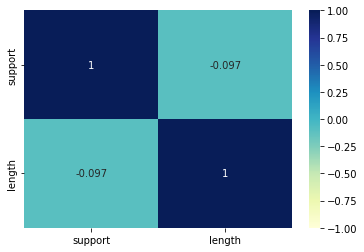

In [29]:
import seaborn as sns
sns.heatmap(data=fpgrowth_frequent_itemsets.corr(method='spearman'),
           annot=True,
           vmin=-1,
           vmax=1,
           center=0,
           cmap='YlGnBu');

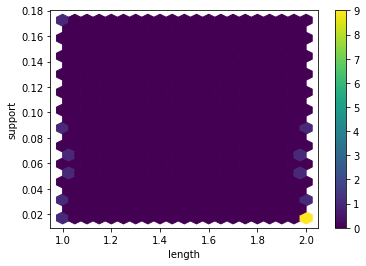

In [30]:
fpgrowth_frequent_itemsets.plot.hexbin(x='length',y='support',cmap='viridis',gridsize=20,sharex=False,bins=10);

## 2.6. ASSOCIATION RULES

mlxtend module compute additional measures such as:

from mlxtend documentation:

  - $leverage(A->C) = support(A->C) - support(A)*support(C)$ 
--->range: [-1, 1]

  - $conviction = [1 - support(C)] / [1 - confidence(A->C)]$ 
--->range: [0, inf]


Leverage computes the difference between the observed frequency of A and C appearing together and the frequency that would be expected if A and C were independent. An leverage value of 0 indicates independence.

A high conviction value means that the consequent is highly depending on the antecedent. For instance, in the case of a perfect confidence score, the denominator becomes 0 (due to 1 - 1) for which the conviction score is defined as 'inf'. Similar to lift, if items are independent, the conviction is 1.

- **Here we are selecting the measure 'Lift' as a score evaluation method**

In [31]:
%%time
from mlxtend.frequent_patterns import association_rules
rules = association_rules(fpgrowth_frequent_itemsets,metric="lift",min_threshold=0.01)

CPU times: user 13.7 s, sys: 1.59 s, total: 15.2 s
Wall time: 17.3 s


In [32]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Step Brothers (2008)),(Anchorman: The Legend of Ron Burgundy (2004)),0.051724,0.068966,0.034483,0.666667,9.666667,0.030916,2.793103
1,(Anchorman: The Legend of Ron Burgundy (2004)),(Step Brothers (2008)),0.068966,0.051724,0.034483,0.500000,9.666667,0.030916,1.896552
2,(Step Brothers (2008)),(Corpse Bride (2005)),0.051724,0.051724,0.017241,0.333333,6.444444,0.014566,1.422414
3,(Corpse Bride (2005)),(Step Brothers (2008)),0.051724,0.051724,0.017241,0.333333,6.444444,0.014566,1.422414
4,(Step Brothers (2008)),(City of God (Cidade de Deus) (2002)),0.051724,0.051724,0.017241,0.333333,6.444444,0.014566,1.422414
...,...,...,...,...,...,...,...,...,...
1549967,(Night of the Shooting Stars (Notte di San Lor...,(Gladiator (2000)),0.017241,0.034483,0.017241,1.000000,29.000000,0.016647,inf
1549968,(Night of the Shooting Stars (Notte di San Lor...,(I'm Not Scared (Io non ho paura) (2003)),0.017241,0.034483,0.017241,1.000000,29.000000,0.016647,inf
1549969,(I'm Not Scared (Io non ho paura) (2003)),(Night of the Shooting Stars (Notte di San Lor...,0.034483,0.017241,0.017241,0.500000,29.000000,0.016647,1.965517
1549970,(Hard-Boiled (Lat sau san taam) (1992)),(John Wick: Chapter Two (2017)),0.017241,0.034483,0.017241,1.000000,29.000000,0.016647,inf


In [33]:
rules[rules["antecedents"].apply(lambda x: "Inception (2010)" in str(x))].sort_values(ascending=False,by='lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1534852,(Inception (2010)),(Gentlemen Broncos (2009)),0.068966,0.017241,0.017241,0.25,14.500000,0.016052,1.310345
1538021,(Inception (2010)),(Rare Exports: A Christmas Tale (Rare Exports)...,0.068966,0.017241,0.017241,0.25,14.500000,0.016052,1.310345
1538287,(Inception (2010)),((500) Days of Summer (2009)),0.068966,0.017241,0.017241,0.25,14.500000,0.016052,1.310345
1538321,(Inception (2010)),"(Avengers, The (2012))",0.068966,0.034483,0.034483,0.50,14.500000,0.032105,1.931034
1538361,(Inception (2010)),(Captain Phillips (2013)),0.068966,0.034483,0.034483,0.50,14.500000,0.032105,1.931034
...,...,...,...,...,...,...,...,...,...
37,(Inception (2010)),(Step Brothers (2008)),0.068966,0.051724,0.017241,0.25,4.833333,0.013674,1.264368
6183,(Inception (2010)),(Pulp Fiction (1994)),0.068966,0.068966,0.017241,0.25,3.625000,0.012485,1.241379
10875,(Inception (2010)),(Fight Club (1999)),0.068966,0.068966,0.017241,0.25,3.625000,0.012485,1.241379
460,(Inception (2010)),(Anchorman: The Legend of Ron Burgundy (2004)),0.068966,0.068966,0.017241,0.25,3.625000,0.012485,1.241379


A less messy way to group the top 10 related movies to the selected one.

We can see here the selected movie inception has top values of lift on related movie due to the same director in them (Dunkirk)

In [34]:
rules[rules["antecedents"].apply(lambda x: "Inception (2010)" in str(x))].groupby(
    ['antecedents', 'consequents'])[['lift']].max().sort_values(ascending=False,by='lift').head(10)

lift
antecedents        consequents                                             
(Inception (2010)) (Gentlemen Broncos (2009))                          14.5
                   (Life Aquatic with Steve Zissou, The (2004))        14.5
                   (400 Blows, The (Les quatre cents coups) (1959))    14.5
                   (A Pigeon Sat on a Branch Reflecting on Existen...  14.5
                   (Arrival (2016))                                    14.5
                   (Andalusian Dog, An (Chien andalou, Un) (1929))     14.5
                   (Angel's Egg (Tenshi no tamago) (1985))             14.5
                   (Illusionist, The (2006))                           14.5
                   (Dunkirk (2017))                                    14.5
                   (Don't Breathe (2016))                              14.5

An increasing value of lift is relatively associated with the increase of other measures such as confidence, lets observe top 10 movies that are relativley confidenent to be watched with the selected movie 'Inception'.

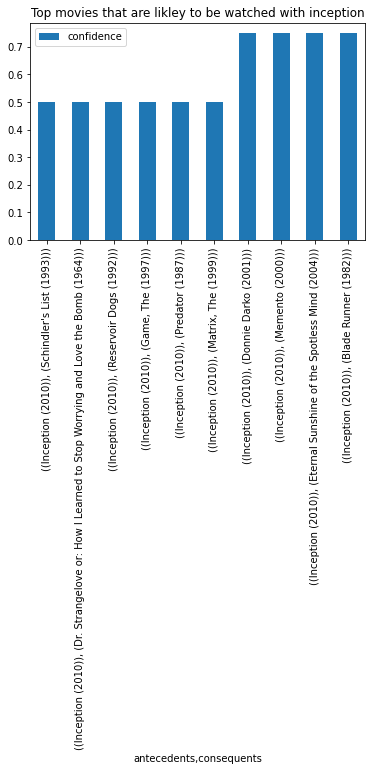

In [35]:
rules[rules["antecedents"].apply(lambda x: "Inception (2010)" in str(x))].groupby(
    ['antecedents', 'consequents'])[['confidence']].max().sort_values(ascending=False,
                                                                      by='confidence').head(10).plot(kind='bar').invert_xaxis()
plt.title('Top movies that are likley to be watched with inception');

## 2.7. Visulizing Association rules (Networkx)

One intresting way to view such data can be used by a network analysis type of plots which can be used to visulize the relation between each feature and it is crosspounding feature in same dataset. Here we used **Networkx** modules which can be implemented to selected top 100 strongest relation. netwrokx modules has many layouts can be plot which depends on nodes, here we selected ``'planar_layout'`` as it can present the huge selection of data points clearly and beatifully.

>- Note: we added a lambda function to convert the forzenset to a string, to eliminate printing frozenset with each created node.

In [36]:
rules['antecedents'] = rules.antecedents.apply(lambda x: next(iter(x)))
rules['consequents'] = rules.consequents.apply(lambda x: next(iter(x)))

TypeError: ignored

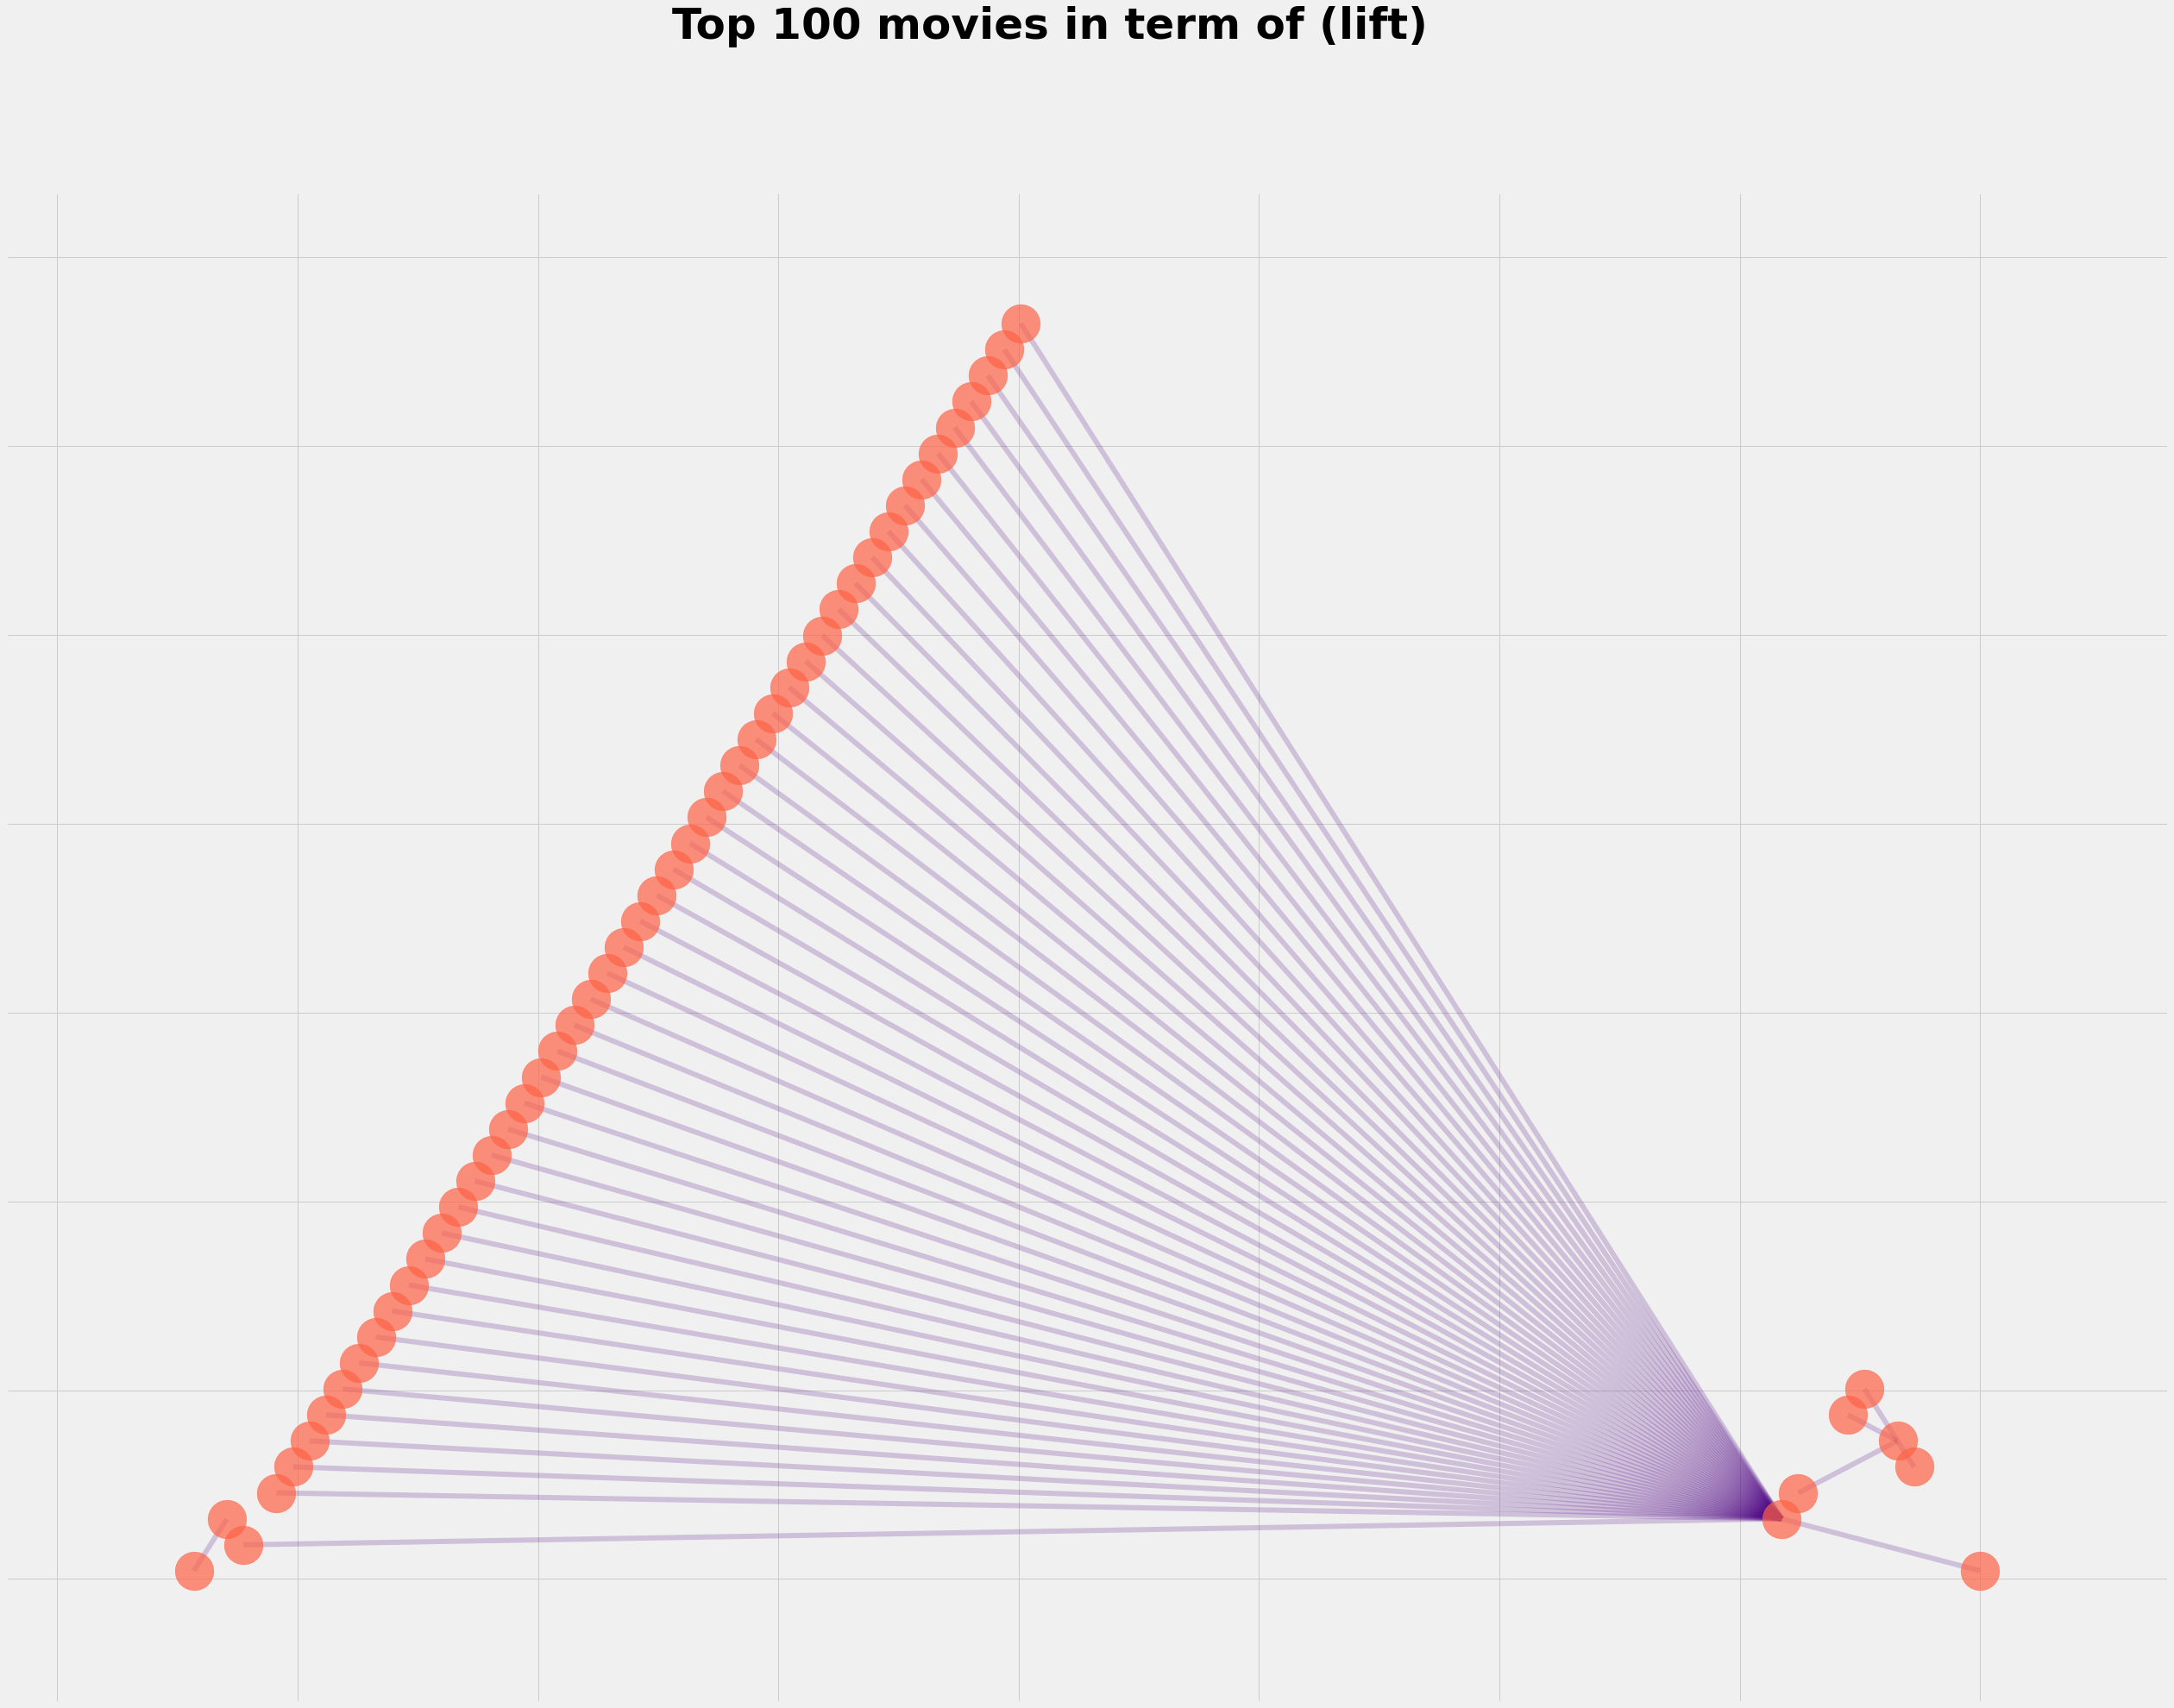

In [37]:
import networkx as nx
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
edges = nx.from_pandas_edgelist(rules.sort_values(ascending=False,by='lift').head(100)
                           ,source='antecedents',target='consequents',edge_attr=None)
plt.subplots(figsize=(40,30))
plt.suptitle('Top 100 movies in term of (lift)', fontsize = 50,fontweight = 'bold')
pos = nx.planar_layout(edges)
nx.draw_networkx_nodes(edges, pos, node_size = 2000,alpha= 0.7,node_color = 'tomato')
nx.draw_networkx_edges(edges, pos, width = 6, alpha = 0.2, edge_color = 'indigo')
nx.draw_networkx_labels(edges, pos, font_size = 25, font_family = 'FreeMono',weight='bold')
plt.grid()
plt.axis('off')
plt.tight_layout()
plt.show()

<a id="section-one"></a>
# 3 ENDING NOTE

Association rules analysis can not generlize the results to work on as a full sphisticated system for movies recomendations, as  other techniques such collabertive filtering used by amazon store which is depending of similarity of users to recomend a product isntead of depending only on frequency of itemsets.